<a href="https://colab.research.google.com/github/riezaferdi/B21-CAP0261/blob/main/colab_master/Master_tfversion1x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

import tensorflow
print(tensorflow.__version__)

!pip install 'h5py==2.10.0' --force-reinstall

TensorFlow 1.x selected.
1.15.2
  Using cached https://files.pythonhosted.org/packages/3f/c0/abde58b837e066bca19a3f7332d9d0493521d7dd6b48248451a9e3fe2214/h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d9/5a/e7c31adbe875f2abbb91bd84cf2dc52d792b5a01506781dbcf25c91daf11/six-1.16.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a5/42/560d269f604d3e186a57c21a363e77e199358d054884e61b73e405dd217c/numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
ERROR: lucid 0.3.10 requires umap-learn, which is not installed.
ERROR: tensorflow 1.15.2 has requirement gast==0.2.2, but you'll have gast 0.4.0 which is incompatible.
ERROR: lucid 0.3.10 has requirement numpy<=1.19, but you'll have numpy 1.20.3 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have si

# Import

In [2]:
import os
import zipfile
import random
import tensorflow as tf
import pathlib
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import shutil

# For clearing folder if necessary

In [3]:
#USE THIS BLOCK CODE IF NECESSARY
try:
  shutil.rmtree('/tmp/dataset_hsxy/')
  shutil.rmtree('/tmp/dataset_hsxy_splitted/')
except OSError:
    pass

# Pre processing

In [4]:
#!wget --no-check-certificate \
#    "https://drive.google.com/file/d/1xqW25CtUd_Li8yeirRiIhMuWUuUr1Aj4/view" \
#    -O "/tmp/dataset-hsxy.zip"

#local_zip = '/tmp/dataset-hsxy.zip'
local_zip = '/content/drive/MyDrive/dataset_hsxy.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
print(len(os.listdir('/tmp/dataset_hsxy/health/')))
print(len(os.listdir('/tmp/dataset_hsxy/s/')))
print(len(os.listdir('/tmp/dataset_hsxy/x/')))
print(len(os.listdir('/tmp/dataset_hsxy/y/')))

# Expected Output:
# 12501
# 12501

100
7
12
14


In [6]:
try:
    #os.mkdir('/tmp/dataset_hsxy')
    os.mkdir('/tmp/dataset_hsxy/training')
    os.mkdir('/tmp/dataset_hsxy/testing')
    os.mkdir('/tmp/dataset_hsxy/training/health')
    os.mkdir('/tmp/dataset_hsxy/training/s')
    os.mkdir('/tmp/dataset_hsxy/training/x')
    os.mkdir('/tmp/dataset_hsxy/training/y')
    os.mkdir('/tmp/dataset_hsxy/testing/health')
    os.mkdir('/tmp/dataset_hsxy/testing/s')
    os.mkdir('/tmp/dataset_hsxy/testing/x')
    os.mkdir('/tmp/dataset_hsxy/testing/y')
except OSError:
    pass

In [7]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


HEALTH_SOURCE_DIR = "/tmp/dataset_hsxy/health/"
TRAINING_HEALTH_DIR = "/tmp/dataset_hsxy/training/health/"
TESTING_HEALTH_DIR = "/tmp/dataset_hsxy/testing/health/"
S_SOURCE_DIR = "/tmp/dataset_hsxy/s/"
TRAINING_S_DIR = "/tmp/dataset_hsxy/training/s/"
TESTING_S_DIR = "/tmp/dataset_hsxy/testing/s/"
X_SOURCE_DIR = "/tmp/dataset_hsxy/x/"
TRAINING_X_DIR = "/tmp/dataset_hsxy/training/x/"
TESTING_X_DIR = "/tmp/dataset_hsxy/testing/x/"
Y_SOURCE_DIR = "/tmp/dataset_hsxy/y/"
TRAINING_Y_DIR = "/tmp/dataset_hsxy/training/y/"
TESTING_Y_DIR = "/tmp/dataset_hsxy/testing/y/"

split_size = .8
split_data(HEALTH_SOURCE_DIR, TRAINING_HEALTH_DIR, TESTING_HEALTH_DIR, split_size)
split_data(S_SOURCE_DIR, TRAINING_S_DIR, TESTING_S_DIR, split_size)
split_data(X_SOURCE_DIR, TRAINING_X_DIR, TESTING_X_DIR, split_size)
split_data(Y_SOURCE_DIR, TRAINING_Y_DIR, TESTING_Y_DIR, split_size)

In [8]:
print(len(os.listdir('/tmp/dataset_hsxy/training/health/')))
print(len(os.listdir('/tmp/dataset_hsxy/training/s/')))
print(len(os.listdir('/tmp/dataset_hsxy/training/x/')))
print(len(os.listdir('/tmp/dataset_hsxy/training/y/')))
print(len(os.listdir('/tmp/dataset_hsxy/testing/health/')))
print(len(os.listdir('/tmp/dataset_hsxy/testing/s/')))
print(len(os.listdir('/tmp/dataset_hsxy/testing/x/')))
print(len(os.listdir('/tmp/dataset_hsxy/testing/y/')))

80
5
9
11
20
2
3
3


# Augmentation

In [9]:
TRAINING_DIR = "/tmp/dataset_hsxy/training/"

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='sparse',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/dataset_hsxy/testing/"

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='sparse',
                                                              target_size=(150, 150))

Found 105 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


#  Train

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Epoch 1/10
2/2 [==============================] - 10s 5s/step - loss: 7.9291 - acc: 0.0762 - val_loss: 9.0650 - val_acc: 0.7143
Epoch 2/10
2/2 [==============================] - 7s 4s/step - loss: 6.9759 - acc: 0.7619 - val_loss: 5.0028 - val_acc: 0.7143
Epoch 3/10
2/2 [==============================] - 7s 4s/step - loss: 3.2104 - acc: 0.7619 - val_loss: 1.3115 - val_acc: 0.7143
Epoch 4/10
2/2 [==============================] - 7s 4s/step - loss: 1.1239 - acc: 0.7619 - val_loss: 1.3263 - val_acc: 0.1071
Epoch 5/10
2/2 [==============================] - 7s 4s/step - loss: 1.4096 - acc: 0.1048 - val_loss: 1.3864 - val_acc: 0.1071
Epoch 6/10
2/2 [==============================] - 7s 4s/step - loss: 1.3843 - acc: 0.1048 - val_loss: 1.3790 - val_acc: 0.4286
Epoch 7/10
2/2 [==============================] - 7s 4s/step - loss: 1.3805 - acc: 0.5619 - val_loss: 1.3698 - val_acc: 0.7500
Epoch 8/10
2/2 [==============================] - 7s 4s/step - loss: 1.3713 - acc: 0.7714 - val_loss: 1.3551 -

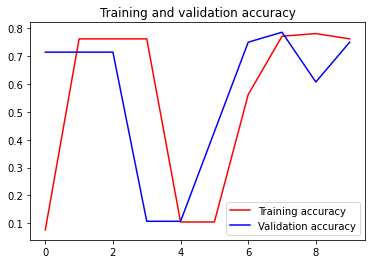

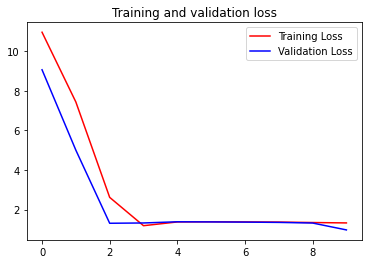

In [11]:
history = model.fit(train_generator, 
                    epochs=10, 
                    validation_data=validation_generator)

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Convert to TFLite

In [12]:
saved_keras_model = './model.h5'
model.save(saved_keras_model)

# actual conversion
converter = tf.lite.TFLiteConverter.from_keras_model_file('./model.h5')

# save model
tflite_model = converter.convert()
open('model.tflite', 'wb').write(tflite_model)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


170036608

# make .txt

In [13]:
f = open("./label.txt","w+")
f.write("health\nx\ny\ns")
f.close() 